In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv ("heart.csv")

1. âge
2. sexe: (1 = male; 0 = female)
3. type de douleur thoracique (4 valeurs)
4. tension artérielle au repos
5. sérum cholestoral en mg/dl
6. glycémie à jeun > 120 mg/dl  (1 = vrai ; 0 = faux)
7. résultats électrocardiographiques au repos (valeurs 0,1,2)
8. fréquence cardiaque maximale atteinte
9. angine d'effort exercise induced angina (1 = yes; 0 = no)
10. oldpeak = dépression ST induite par l'exercice par rapport au repos
11. la pente du segment ST d'effort maximal
12. nombre de vaisseaux principaux (0-3) colorés par fluoroscopie
13. tal : 0 = normal ; 1 = défaut corrigé ; 2 = défaut réversible
14. 0 = pas de maladie et 1 = maladie


## Data first look

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

## EDA

In [9]:
#sns.displot(x = df.oldpeak, kde = True, color = "blue", hue = "target",data=df)

In [10]:
#sns.displot(x = df.age, kde = True, color = "blue", hue = "target",data=df)

In [11]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [12]:
numerical_data = df[["age","chol","trestbps","thalach","oldpeak"]]
numerical_data.head()
categorial_data = df[["sex","cp","fbs","restecg","exang","slope","ca","thal"]]
categorial_data.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2


<Figure size 1152x576 with 0 Axes>

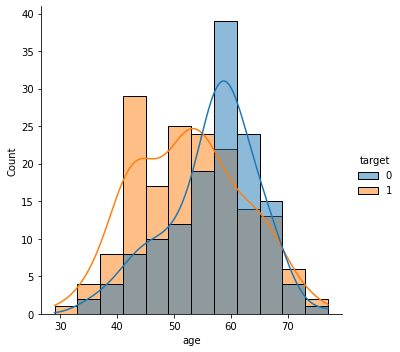

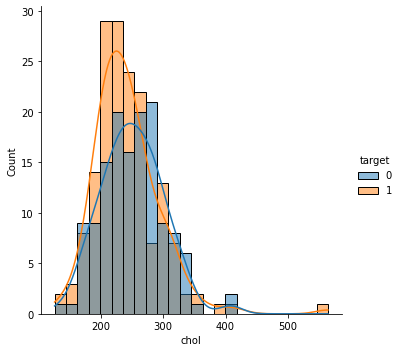

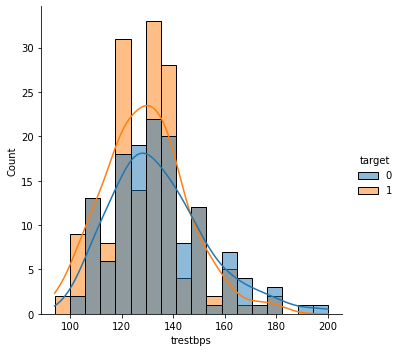

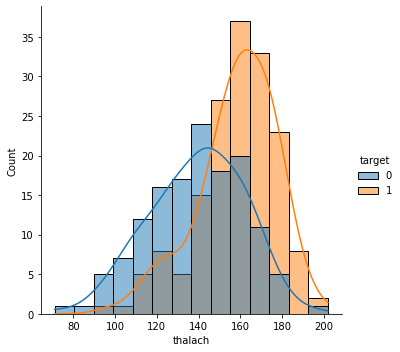

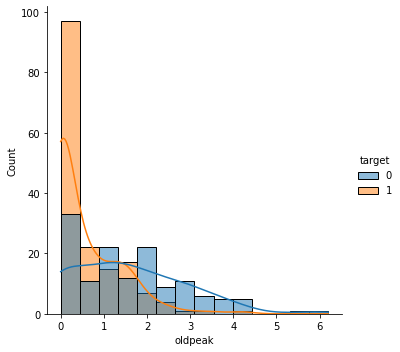

In [13]:
plt.figure(figsize=(16,8))
for i in numerical_data:
    sns.displot(x = i, kde = True, color = "blue", hue = "target",data=df)

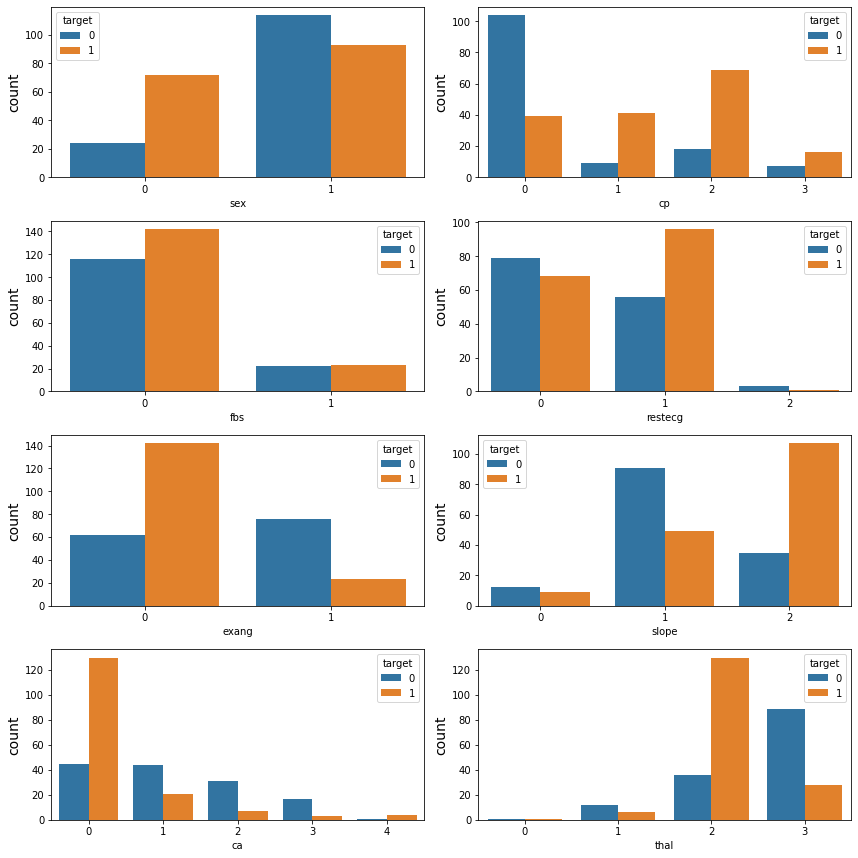

In [14]:
"""for o in categorial_data:
    sns.countplot(x =o,data=df)"""
plt.figure(figsize=(12,12))
for index,column in enumerate(categorial_data):
    plt.subplot(4,2,index+1)
    sns.countplot(data=df,x=column, hue = "target")
    
    plt.ylabel("count", fontsize=14)

plt.tight_layout(pad = 1.0)
plt.show()

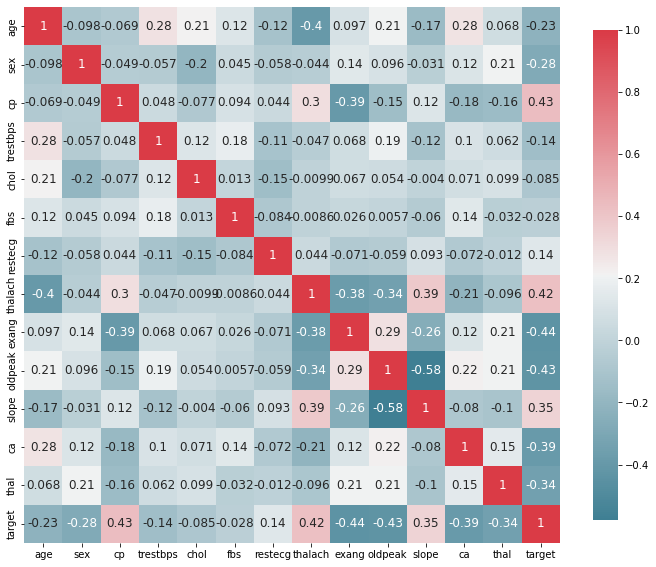

In [15]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map( df )

## Split the Data

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
X = df.drop(['target'], axis=1)
y = df['target']
x_train,x_test,y_train , y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

## Modeling

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression


## Logistik Regression

In [18]:
logis_model = LogisticRegression()
logis_model.fit(x_train, y_train)
y_logis_pred = logis_model.predict(x_test)

C:\Users\Cheikh ibreu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:xlabel='y_predi', ylabel='y_test'>

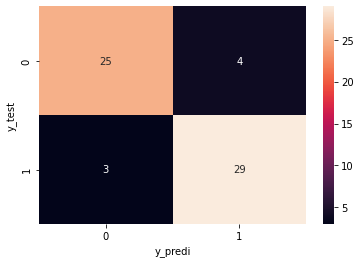

In [19]:
confusion_matrix = pd.crosstab(y_test, y_logis_pred, rownames=['y_test'], colnames=['y_predi'])
sns.heatmap(confusion_matrix, annot=True)


## KNN 

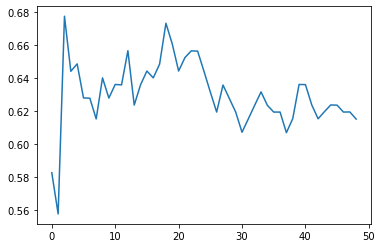

In [30]:
from sklearn.model_selection import cross_val_score
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), x_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

In [32]:
knn = KNeighborsClassifier (n_neighbors=2)
knn.fit(x_train, y_train)
y_knn_pred = knn.predict(x_test)

<AxesSubplot:xlabel='y_predi', ylabel='y_test'>

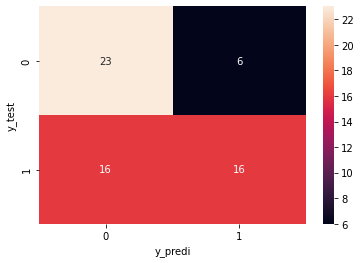

In [33]:
confusion_matrix = pd.crosstab(y_test, y_knn_pred, rownames=['y_test'], colnames=['y_predi'])
sns.heatmap(confusion_matrix, annot=True)

## Random Forest

In [34]:
para_grid = { 
    'n_estimators': [10,20, 50,100,150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' :  range(1,20,1),
    'criterion' :['gini', 'entropy']
}
grid = GridSearchCV( estimator = RandomForestClassifier(random_state=42), param_grid = para_grid, cv=5)
grid.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 50, 100, 150]})

In [35]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 13,
 'max_features': 'auto',
 'n_estimators': 10}

In [36]:
randfo = RandomForestClassifier( max_features='auto', max_depth=13, criterion='gini',n_estimators = 10)
randfo.fit (x_train, y_train)
ranfo_pred=randfo.predict(x_test) 

<AxesSubplot:xlabel='y_predi', ylabel='y_test'>

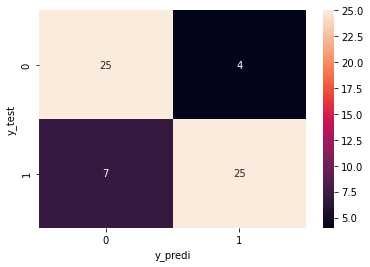

In [37]:
confusion_matrix = pd.crosstab(y_test, ranfo_pred, rownames=['y_test'], colnames=['y_predi'])
sns.heatmap(confusion_matrix, annot=True)